## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [22]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

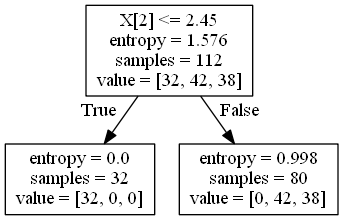

In [23]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_pdf("iris.pdf")
Image(graph.create_png())

In [24]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.6842105263157895


In [25]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [26]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0. 0. 1. 0.]


In [27]:
boston = datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [60]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立模型
clf = DecisionTreeRegressor()

y_train
# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [61]:
y_test

array([16.5, 24.8, 17.4, 19.3, 37.6, 24.2, 35.4, 19.9, 27.5, 17. , 31.2,
       24.4, 16.1, 27. , 21. , 14.9, 18.9,  6.3, 16.3, 13.9,  8.8, 19.4,
       18.8, 19.8, 17.5, 19.3, 20. , 14.3, 16.1, 19.5, 11. , 21.9, 31. ,
       22. , 15.1, 13.3, 28.7, 46.7, 22.2, 22.8, 42.3, 41.3, 16.7, 31.1,
       26.7, 19.4, 50. , 16.6, 19.5, 24.4, 28.5, 22.3, 12.1, 28.6, 15.6,
       19.2, 27.5, 32. , 20.2, 32.4, 18.4, 19.9, 29.8, 20.1, 43.5, 24.5,
       50. ,  7.2, 19.1, 21.2, 22.6, 22.9, 25. , 23.3, 17.3, 33. , 17.8,
       23.8, 10.9, 18.6, 19.3, 16.7, 28. , 18.2, 29.1, 11.9, 32.7, 18.3,
       22.4, 45.4, 31.5, 48.5, 19.8, 41.7, 22.2, 20.3, 20.7, 50. , 11.8,
       19.5,  8.7, 23.3])

In [62]:
y_pred

array([18.9, 22. , 16.2, 14.4, 50. , 23.8, 36.1, 19. , 17.2, 15.6, 23.9,
       16.5, 19.9, 21.6, 19.6, 13.4, 19.4,  7.4,  5. , 15.6,  7. , 15.6,
       20.5, 19.2, 18.6, 20.1, 14.4, 13.6, 21.4, 19.4,  7.5, 22.2, 30.7,
       22.8, 14.2, 11.3, 33.2, 46. , 24.4, 23.1, 44. , 35.4, 15.4, 29.4,
       27.5, 19.4, 50. , 21.7, 21.4, 23. , 29.6, 23.8,  8.5, 27.1, 14.8,
       20.3, 27.5, 33.1, 20. , 33.1, 18.1, 21.5, 30.5, 19.6, 43.1, 29.4,
       22. , 10.2, 23.2, 23. , 21.1, 20.3, 22. , 30.1, 13.3, 36.2, 13.6,
       21. , 17.7, 23. , 20. , 15.2, 26.6, 23. , 28.1, 20.4, 33.1, 21.8,
       21.7, 50. , 29.1, 50. , 23.2, 50. , 21.1, 24.5, 19.7, 27.9, 14.6,
       19. , 10.2, 18.9])

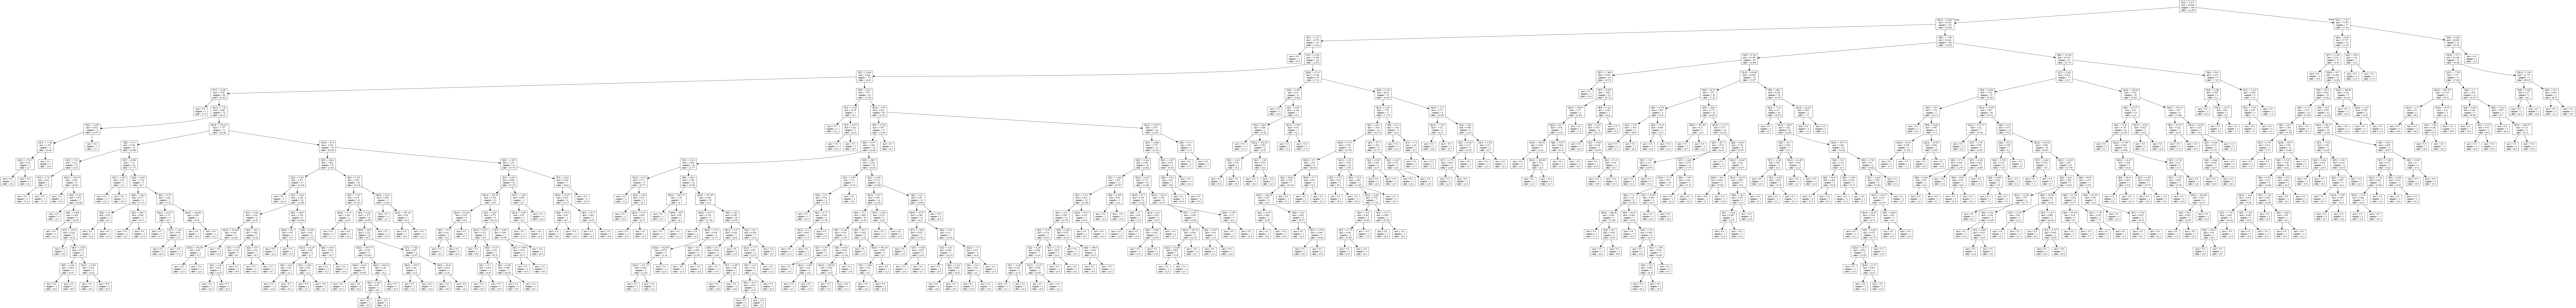

In [63]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_pdf("iris.pdf")
Image(graph.create_png())

In [67]:
mae = metrics.mean_absolute_error(y_pred, y_test) # 使用 MAE 評估
mse = metrics.mean_squared_error(y_pred, y_test) # 使用 MSE 評估
r2 = metrics.r2_score(y_pred, y_test) # 使用 r-square 評估
print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

MAE:  3.064705882352941
MSE:  25.534901960784314
R-square:  0.7278471395422198


In [53]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [54]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.12804451 0.01468191 0.02003372 0.01648755 0.06316763 0.14656027
 0.12819336 0.09854053 0.02681995 0.03599037 0.06683833 0.09800326
 0.15663862]
